### https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

## Set up Dataset

In [1]:
import pandas as pd
import numpy as np

HealthData = pd.read_csv('/Users/janruffner/Desktop/HealthcareFraudCapstoneProject/Data/HealthData.csv', index_col=0)

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
X=HealthData.drop(['PotentialFraud2','Majority', 'Majority_1', 
                  'GenderRatio', 'sum.ChronicCond_Heartfailure', 'sum.ChronicCond_stroke','sum.ChronicCond_ObstrPulmonary',
                   'sum.ChronicCond_rheumatoidarthritis', 'sum.ChronicCond_Cancer', 'sum.ChronicCond_Heartfailure', 'sum.ChronicCond_Alzheimer',
                  'sum.ChronicCond_Osteoporasis', 'sum.ChronicCond_Diabetes', 'sum.Claims', 'sum.ClaimsID', 'sum.States', 'BothServices',
                   'Inpatient', 'Outpatient', 'DistinctServices'], axis=1)
y=HealthData[['PotentialFraud2']]

## Create testing and training sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state=42)

## Import model library

In [5]:
from xgboost import XGBClassifier
from matplotlib import pyplot

## Grid Search for Optimal Parameters using Cross-Validation

In [6]:
# Number of trees in random forest
n_estimators = [40,100] #[int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Maximum number of levels in tree
max_depth = [i*2+3 for i in range(1,5)] + [None]
# Minimum number of samples required to split a node
learning_rates = [10**i for i in range(-3,2)]
# Method of selecting learning rate
colsample_bytree = [0.5, 0.8, 1]
# number of columns used by each tree
gamma = [0,1,5]
# Acts as a regularization parameter

bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
             'learning_rates': learning_rates,
             'colsample_bytree': colsample_bytree,
             'gamma': gamma}

In [7]:
%timeit
xgb = XGBClassifier(n_estimators =100,
                    max_depth=5,
                    learning_rates=0.001,
                    colsample_bytree=0.5,
                    gamma=0,
                    random_state=42, 
                   objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
xgb_Grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, verbose=2, n_jobs=4)
xgb_Grid.fit(X_train,y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   36.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 14.3min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 4500 out of 4500 | elapsed: 28.4min finished
/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1

[14:06:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { learning_rates } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:06:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, learning_rates=0.001,
                                     max_delta_step=None, max_depth=5,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     n_estima...00, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

## Select the best version of the model

In [11]:
print(xgb_Grid.best_params_)
xgb_best = xgb_Grid.best_estimator_

{'colsample_bytree': 1, 'gamma': 5, 'learning_rates': 0.001, 'max_depth': None, 'n_estimators': 40}


In [12]:
xgb_best.score(X_test, y_test)

0.940795559666975

In [13]:
xgb = XGBClassifier(n_estimators =40,
                    max_depth=7,
                    learning_rates=0.001,
                    colsample_bytree=1,
                    gamma=5,
                    random_state=42) 

xgb.fit(X_train, y_train) 

[14:19:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { learning_rates } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:19:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, learning_rates=0.001, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
xgb_best.score(X_train, y_train)

0.9460897732531236

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, xgb_best.predict(X_train))

array([[3888,   29],
       [ 204,  201]])

In [16]:
confusion_matrix(y_test, xgb_best.predict(X_test))

array([[968,  12],
       [ 52,  49]])

In [17]:
xgb_best.score(X_test, y_test)

0.940795559666975

## Feature Importance

In [18]:
feature_importances = xgb_best.feature_importances_ 
feature_list = list(X_train)
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])
relative_importances.sort_values(by="importance", ascending=False)

,importance
sum.InscClaimAmtReimbursed,0.484552
sum.Diagnosis,0.068381
OupatientInpatient2Ratio,0.066745
Majority_10,0.061079
sum.AttendingPhysicians,0.054648
sum.BeneID,0.052718
mean.Age,0.052111
summean_perc,0.050280
Majority_49,0.045209
Majority_24,0.032303


<AxesSubplot:>

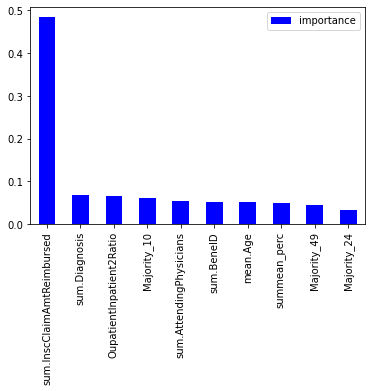

In [16]:
relative_importances.sort_values(by="importance", ascending=False).head(10).plot.bar(color='b')